Number of original SIFT features:  6233
Number of less SIFT features:  703


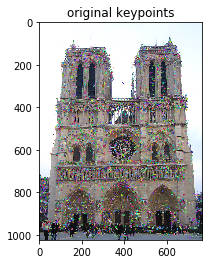

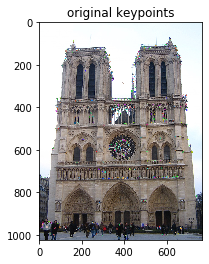

In [1]:
import cv2
import matplotlib.pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

# Read image
image = cv2.imread("/Users/tudou/Downloads/COMP9517T202/Lab_2/COMP9517 20T2 Lab2 Image.jpg")

# Convert image to grayscale
grayImageOrig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Task1. Initialize SIFT detector, detect keypoints, store and show SIFT keypoints of original image in a Numpy array
sift = SiftDetector(params=None)

kp,des = sift.detector.detectAndCompute(grayImageOrig, None)
kp_gray = cv2.drawKeypoints(image, kp, grayImageOrig)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)

print("Number of original SIFT features: ", len(kp))
plt.figure(1)
plt.title("original keypoints")
plt.imshow(kp_gray)

# Parameters for SIFT initializations such that we find only 10% of keypoints
params_less = {
    'n_features': 0,    
    'n_octave_layers': 3,
    'contrast_threshold': 0.13,  # updated threshold.This value will vary for different images to view 10% of keypoints.
    'edge_threshold': 10,
    'sigma': 1.6
}

sift = SiftDetector(params=params_less)

kp_less,des1 = sift.detector.detectAndCompute(grayImageOrig, None)
kp_gray_less = cv2.drawKeypoints(image, kp_less, grayImageOrig)
kp_gray_less = cv2.cvtColor(kp_gray_less, cv2.COLOR_BGR2RGB)

print("Number of less SIFT features: ", len(kp_less))
plt.figure(2)
plt.title("original keypoints")
plt.imshow(kp_gray_less)
plt.show()



Number of upscaled SIFT features:  852


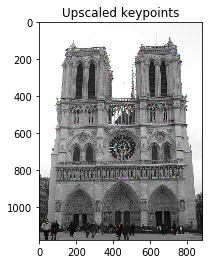

Matched SIFT features:  457


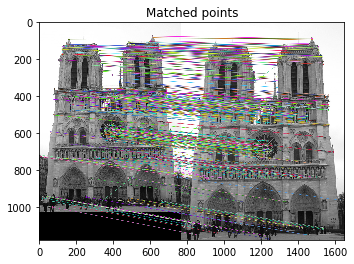

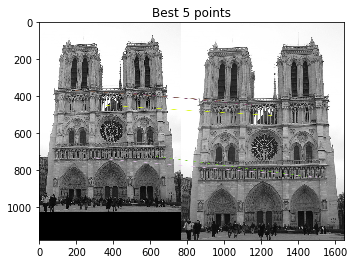

In [2]:
# Task2. Upscale the image
scale_percent = 115  # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resizedImage = cv2.resize(grayImageOrig, dim, interpolation=cv2.INTER_AREA)

# Compute SIFT features for rescaled image
kp_up,des2 = sift.detector.detectAndCompute(resizedImage, None)
kp_gray_up = cv2.drawKeypoints(resizedImage, kp_up, resizedImage)

print("Number of upscaled SIFT features: ", len(kp_up))
plt.figure(1)
plt.title("Upscaled keypoints")
plt.imshow(kp_gray_up)
plt.show()

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
"""This test rejects poor matches by computing the ratio between the best and second-best match. 
If the ratio is below some threshold, the match is discarded as being low-quality."""
good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SIFT features: ",len(good))

# Draw matches
result = cv2.drawMatchesKnn(
    grayImageOrig, kp_less,
    resizedImage, kp_up,
    good, None, flags=2)

plt.figure(2)
plt.title("Matched points")
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for ind, kp in enumerate(good):
    distance.append((kp[0].distance,ind))
    distance.sort(reverse=True)

best = []
for i in range(5):
    best.append(good[distance[i][1]])
    
result_best = cv2.drawMatchesKnn(
    grayImageOrig, kp_less,
    resizedImage, kp_up,
    best, None, flags=2)

plt.figure(3)
plt.title("Best 5 points")
plt.imshow(result_best)
plt.show()



Number of rotated SIFT features:  648


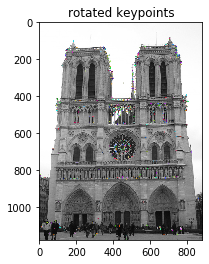

Matched SIFT features:  426


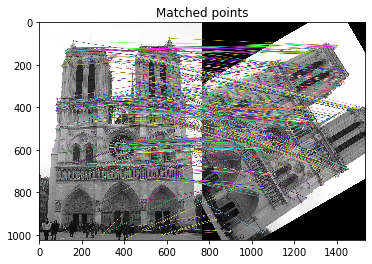

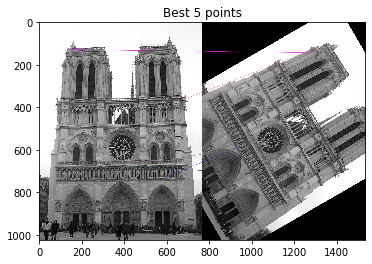

In [4]:
# Task3. Rotate the image
import math
import numpy as np
import sys

# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))


# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center


# center of image points. 'img_center' is in (Y, X) order.
img_center = get_img_center(grayImageOrig)
x_coord = img_center[1]
y_coord = img_center[0]

# Degrees with which to rotate image
angle = -60

# Rotate image
rotate_gray = rotate(grayImageOrig, x_coord, y_coord, angle)

# Compute SIFT features for rotated image
kp_rotate, des3 = sift.detector.detectAndCompute(rotate_gray, None)
kp_gray_rotate = cv2.drawKeypoints(rotate_gray, kp_rotate, None)

print("Number of rotated SIFT features: ", len(kp_rotate))
plt.figure(1)
plt.title("rotated keypoints")
plt.imshow(kp_gray_up)
plt.show()


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des3, k=2)

# Apply ratio test
"""This test rejects poor matches by computing the ratio between the best and second-best match. 
If the ratio is below some threshold, the match is discarded as being low-quality."""
good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SIFT features: ",len(good))

# cv2.drawMatchesKnn
result = cv2.drawMatchesKnn(
    grayImageOrig, kp_less,
    rotate_gray, kp_rotate,
    good, None, flags=2)

plt.figure(2)
plt.title("Matched points")
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for ind, kp in enumerate(good):
    distance.append((kp[0].distance,ind))
    distance.sort(reverse=True)

best = []
for i in range(5):
    best.append(good[distance[i][1]])
    
result_best = cv2.drawMatchesKnn(
    grayImageOrig, kp_less,
    rotate_gray, kp_rotate,
    best, None, flags=2)

plt.figure(3)
plt.title("Best 5 points")
plt.imshow(result_best)
plt.show()

